In [313]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import feature_selection
from scipy.stats import chi2_contingency
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,precision_recall_curve
import numpy as np

In [143]:
#Importation des data
data_export = pd.read_csv('data_export.csv', encoding='utf-8')
data_prof = pd.read_csv('Data_Arbre.csv')

As factor -> OrdinalEncoder

In [125]:
encoder = OrdinalEncoder()
lst_col = ["fk_arb_etat","fk_port","fk_pied","fk_situation","fk_revetement","fk_nomtech","clc_quartier","fk_stadedev","feuillage"]
# cols = data_prof.columns
# print(cols)
temp = data_prof[lst_col]
# temp.head()
data_prof[lst_col] = encoder.fit_transform(temp)

In [126]:
data_prof.head()

,longitude,latitude,clc_quartier,clc_secteur,haut_tot,haut_tronc,tronc_diam,fk_arb_etat,fk_stadedev,fk_port,fk_pied,fk_situation,fk_revetement,age_estim,fk_prec_estim,clc_nbr_diag,fk_nomtech,villeca,feuillage,remarquable
0,3.293264,49.840500,7.0,Quai Gayant,6.0,2.0,37.0,1.0,1.0,8.0,4.0,0.0,0.0,15.0,5.0,0.0,185.0,VILLE,1.0,Non
1,3.273380,49.861409,8.0,Stade Cepy,13.0,1.0,160.0,1.0,0.0,8.0,4.0,1.0,0.0,50.0,10.0,0.0,129.0,VILLE,0.0,Non
2,3.289068,49.844513,7.0,Rue Villebois Mareuil,12.0,3.0,116.0,4.0,0.0,8.0,4.0,0.0,0.0,30.0,10.0,0.0,20.0,VILLE,1.0,Non
3,3.302387,49.861778,6.0,Square des Marronniers,16.0,3.0,150.0,1.0,0.0,8.0,4.0,1.0,0.0,50.0,2.0,0.0,15.0,VILLE,1.0,Non
4,3.304047,49.858446,6.0,Avenue Buffon,5.0,2.0,170.0,2.0,0.0,6.0,4.0,2.0,0.0,40.0,2.0,0.0,192.0,VILLE,1.0,Non


In [138]:
corres = data_prof.corr(method='pearson',numeric_only=True).style.background_gradient(cmap='coolwarm')
corres

,longitude,latitude,clc_quartier,haut_tot,haut_tronc,tronc_diam,fk_arb_etat,fk_stadedev,fk_port,fk_pied,fk_situation,fk_revetement,age_estim,fk_prec_estim,clc_nbr_diag,fk_nomtech,feuillage
longitude,1.000000,-0.020745,0.059562,0.152302,0.087468,0.077484,-0.017869,-0.126503,-0.183528,-0.093951,0.034636,0.085958,-0.028906,0.004257,-0.032664,-0.098990,-0.058804
latitude,-0.020745,1.000000,-0.362553,0.125222,0.054681,0.008317,-0.010658,0.024598,0.068161,0.080363,0.136452,-0.081462,-0.015870,-0.072914,-0.041084,-0.129809,-0.119188
clc_quartier,0.059562,-0.362553,1.000000,-0.154754,-0.194848,-0.095732,0.016893,-0.009660,0.015647,-0.074479,0.027110,0.005702,-0.164819,-0.142464,-0.153530,0.016499,0.049166
haut_tot,0.152302,0.125222,-0.154754,1.000000,0.496415,0.686894,0.123743,-0.275230,0.189495,0.265550,0.136142,-0.001320,0.601767,0.496149,0.396635,-0.089449,-0.060066
haut_tronc,0.087468,0.054681,-0.194848,0.496415,1.000000,0.361884,-0.007190,-0.140088,0.023269,0.009637,0.076888,0.016267,0.474419,0.368215,0.336130,0.007630,-0.048405
tronc_diam,0.077484,0.008317,-0.095732,0.686894,0.361884,1.000000,0.138433,-0.392392,0.251190,0.206433,0.046207,0.135132,0.779173,0.607214,0.361216,0.002313,-0.013630
fk_arb_etat,-0.017869,-0.010658,0.016893,0.123743,-0.007190,0.138433,1.000000,0.099131,0.054423,0.035010,-0.041867,0.024277,0.095225,0.123399,0.233170,0.005708,0.033025
fk_stadedev,-0.126503,0.024598,-0.009660,-0.275230,-0.140088,-0.392392,0.099131,1.000000,-0.269987,-0.132240,-0.047241,-0.094721,-0.353366,-0.282233,0.086088,0.050265,0.111827
fk_port,-0.183528,0.068161,0.015647,0.189495,0.023269,0.251190,0.054423,-0.269987,1.000000,0.367158,-0.133029,-0.034187,0.269559,0.324788,0.053373,0.059974,0.051613
fk_pied,-0.093951,0.080363,-0.074479,0.265550,0.009637,0.206433,0.035010,-0.132240,0.367158,1.000000,0.047100,-0.172116,0.209443,0.255454,0.149925,-0.016817,0.012643


In [128]:
#Chi 2
data2  =  data_prof[["haut_tot", 'haut_tronc', 'tronc_diam', 'fk_stadedev', "age_estim", "fk_prec_estim", "clc_nbr_diag", "fk_arb_etat"]].copy(deep=True)
data2.dropna(inplace=True)
# chi2_score = feature_selection.chi2(data2[["haut_tot", 'haut_tronc', 'tronc_diam', 'fk_stadedev', "age_estim", "fk_prec_estim", "clc_nbr_diag"]], data2[["fk_arb_etat"]])
chi2_score = feature_selection.chi2(data2[["haut_tot", 'haut_tronc', 'tronc_diam', 'fk_stadedev', "age_estim", "fk_prec_estim", "clc_nbr_diag"]], data2[["fk_arb_etat"]])
chi2_score

(array([ 864.16375396,   92.91273101, 8348.33066975,   85.84823309,
        1823.24034435,  542.58858879,  714.98526157]),
 array([1.51511215e-184, 1.64109658e-018, 0.00000000e+000, 4.99798772e-017,
        0.00000000e+000, 5.09693128e-115, 2.82493556e-152]))

In [129]:
cols = ["fk_arb_etat","tronc_diam","haut_tot","fk_stadedev","age_estim"]
dataset = data_prof[cols]
dataset.head()

X_dataset = dataset.drop(columns=["fk_arb_etat"])
Y_dataset = dataset["fk_arb_etat"]

In [130]:
X_train, X_test, Y_train, Y_test = train_test_split(X_dataset, Y_dataset, test_size=0.2, random_state=42)
# X_train.head()
# Y_train.head()

In [131]:
Foret = RandomForestClassifier(n_estimators=100, random_state=42)
Foret.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [132]:
test = Foret.predict(X_test)
accuracy_score(Y_test, test)

0.8927125506072875

In [133]:
rforest = RandomForestClassifier(n_estimators=100, random_state=42)
t = GridSearchCV(rforest, param_grid={'n_estimators': [25, 50, 75,100, 200, 300, 400, 500]}, cv=5, scoring='accuracy', n_jobs=-1)
t.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'n_estimators': [25, 50, 75, 100, 200, 300, 400, 500]},
             scoring='accuracy')

In [134]:
print(t.best_estimator_)

RandomForestClassifier(n_estimators=200, random_state=42)


In [135]:
Foret_200 = RandomForestClassifier(n_estimators=200, random_state=42)
Foret_200.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [136]:
test = Foret_200.predict(X_test)
accuracy_score(Y_test, test)

0.8940620782726046

# Methode binaire essouche ou non

In [234]:
#Sans ordinal encoder pour l'instant

cols = ["fk_arb_etat","tronc_diam","haut_tot","fk_stadedev","age_estim"]
dataset_bin = data_prof[cols]

# # dataset_bin.assign("Essouché")

# dataset_bin["essouche"] = 0

# dataset_bin.update(dataset_bin)

# dataset_bin.loc[dataset_bin["fk_arb_etat"] == "Essouché", "essouche"] = 1
# dataset_bin[dataset_bin["fk_arb_etat"] == "Essouché"]["essouche"] == 1


dataset_bin.fk_arb_etat = dataset_bin.fk_arb_etat.replace(["ABATTU","EN PLACE", "Non essouché", "REMPLACÉ","SUPPRIMÉ"],'non essouché')

#Encodage
encoder = OrdinalEncoder()
lst_col = ["fk_arb_etat", 'fk_stadedev']

temp = dataset_bin[lst_col]

dataset_bin[lst_col] = encoder.fit_transform(temp)




X_dataset_bin = dataset_bin.drop(columns=["fk_arb_etat"])
Y_dataset_bin = dataset_bin["fk_arb_etat"]

X_train, X_test, Y_train, Y_test = train_test_split(X_dataset_bin, Y_dataset_bin, test_size=0.2, random_state=42)

dataset_bin.update(dataset_bin)

dataset_bin.head()
# dataset_bin.fk_arb_etat.value_counts()

C:\Users\thile\AppData\Local\Temp\ipykernel_11296\3228893564.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_bin.fk_arb_etat = dataset_bin.fk_arb_etat.replace(["ABATTU","EN PLACE", "Non essouché", "REMPLACÉ","SUPPRIMÉ"],'non essouché')
C:\Users\thile\AppData\Local\Temp\ipykernel_11296\3228893564.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_bin[lst_col] = encoder.fit_transform(temp)


,fk_arb_etat,tronc_diam,haut_tot,fk_stadedev,age_estim
0,1.0,37.0,6.0,1.0,15.0
1,1.0,160.0,13.0,0.0,50.0
2,1.0,116.0,12.0,0.0,30.0
3,1.0,150.0,16.0,0.0,50.0
4,0.0,170.0,5.0,0.0,40.0


In [235]:
rforest = RandomForestClassifier(n_estimators=100, random_state=42)
t = GridSearchCV(rforest, param_grid={'n_estimators': [25, 50, 75,100, 200, 300, 350, 400, 450, 500]}, cv=5, scoring='accuracy', n_jobs=-1)
t.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'n_estimators': [25, 50, 75, 100, 200, 300, 350, 400,
                                          450, 500]},
             scoring='accuracy')

In [214]:
print(t.best_estimator_)

RandomForestClassifier(n_estimators=350, random_state=42)


In [236]:
Foret_350 = RandomForestClassifier(n_estimators=350, random_state=42)
Foret_350.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=350, random_state=42)

In [237]:
test = Foret_350.predict(X_test)
accuracy_score(Y_test, test)

0.9736842105263158

# Feature selection

In [225]:
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import make_classification

In [243]:
Y_test.shape

(1482,)

In [263]:
cols = ["fk_arb_etat","tronc_diam","haut_tot","fk_stadedev","age_estim", "clc_quartier", "feuillage", "fk_port", "fk_nomtech"]
data_feature = data_prof[cols]

data_feature.loc[data_feature["fk_arb_etat"] == "Essouché", "fk_arb_etat"] = 1
data_feature.loc[data_feature["fk_arb_etat"] != 1, "fk_arb_etat"] = 0
# data_feature.head()


,fk_arb_etat,tronc_diam,haut_tot,fk_stadedev,age_estim,clc_quartier,feuillage,fk_port,fk_nomtech
0,0,37.0,6.0,Jeune,15.0,Quartier du Centre-Ville,Feuillu,semi libre,QUERUB
1,0,160.0,13.0,Adulte,50.0,Quartier du Vermandois,Conifère,semi libre,PINNIGnig
2,0,116.0,12.0,Adulte,30.0,Quartier du Centre-Ville,Feuillu,semi libre,ACEPSE
3,0,150.0,16.0,Adulte,50.0,Quartier de l'Europe,Feuillu,semi libre,ACEPLA
4,1,170.0,5.0,Adulte,40.0,Quartier de l'Europe,Feuillu,réduit,SALBAB


In [ ]:
#Encodage
encoder = OrdinalEncoder()
lst_col = ['fk_stadedev', 'clc_quartier', 'feuillage', 'fk_port', 'fk_nomtech']

temp = data_feature[lst_col]

dataset_bin[lst_col] = encoder.fit_transform(temp)

In [269]:
X_data_feature = dataset_bin.drop(columns=["fk_arb_etat"])
Y_data_feature = dataset_bin["fk_arb_etat"]

X_train, X_test, Y_train, Y_test = train_test_split(X_data_feature, Y_data_feature, test_size=0.2, random_state=42)

In [270]:
foret_feature = RandomForestClassifier(n_estimators=100, random_state=42)
foret_feature.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [271]:
# Extract feature importances
importances = foret_feature.feature_importances_

cols_lst_feature = ["tronc_diam","haut_tot","fk_stadedev","age_estim", "clc_quartier", "feuillage", "fk_port", "fk_nomtech"]

feature_names = dataset_bin[cols_lst_feature].columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})


In [272]:
# Rank features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

        Feature  Importance
0    tronc_diam    0.346318
1      haut_tot    0.194139
7    fk_nomtech    0.190894
3     age_estim    0.106650
4  clc_quartier    0.101937
6       fk_port    0.031280
2   fk_stadedev    0.017373
5     feuillage    0.011409


In [273]:
# Select top N features (example selecting top 10 features)
top_features = feature_importance_df['Feature'][:3].values
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

In [289]:
Foret_new = RandomForestClassifier(n_estimators=350, random_state=42, n_jobs=-1)
Foret_new.fit(X_train_selected, Y_train)
test = Foret_new.predict(X_test_selected)
score = accuracy_score(Y_test, test)
print(format(score*100, ".2f"),'%')

97.98 %


Cross Val Score

In [292]:
scores = cross_val_score(Foret_new, X_test_selected, Y_test, cv=5, scoring='accuracy', n_jobs=-1)

In [293]:
print(np.mean(scores))

0.9804281554281553


In [315]:
grids = GridSearchCV(Foret_new, param_grid={'n_estimators': [i*25 for i in range(1,20)]}, cv=5, scoring='accuracy', n_jobs=-1)
best_model = grids.fit(X_train_selected, Y_train)

In [298]:
print(grids.best_estimator_)

RandomForestClassifier(n_estimators=75, n_jobs=-1, random_state=42)


In [311]:
# Y_train.value_counts()
# Y_test.value_counts()
data_feature.fk_arb_etat.value_counts()

fk_arb_etat
0    7244
1     165
Name: count, dtype: int64

In [319]:
classes = cross_val_predict(best_model, X_test_selected, Y_test, cv=3)
# print(classes)
matrice = confusion_matrix(Y_test, classes, normalize='true')

print(matrice)

[[0.         1.        ]
 [0.00205903 0.99794097]]


In [318]:
import matplotlib.pyplot as plt

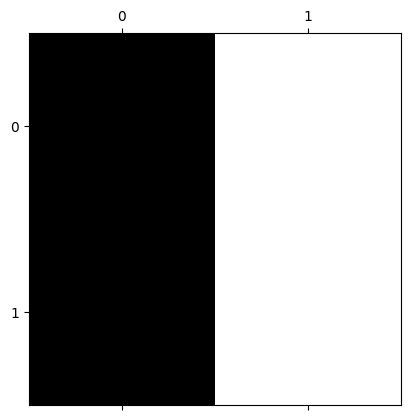

In [320]:
plt.matshow(matrice,cmap=plt.cm.gray)